In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.colors

In [2]:
data = pd.read_csv(r'/content/Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.shape

(178, 13)

Finding Null Values

In [7]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
corr_data = data.corr()
corr_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


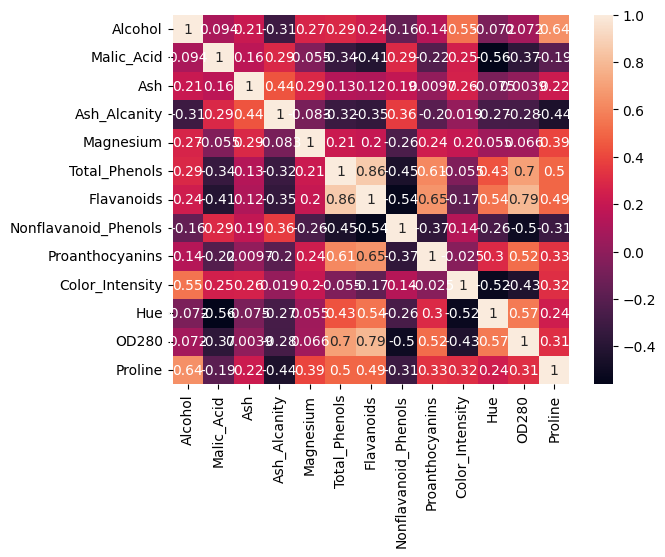

In [9]:
sns.heatmap(corr_data, annot=True)
plt.show()

In [10]:
X = data.iloc[: , 0:13].values

###Kmeans Clustering

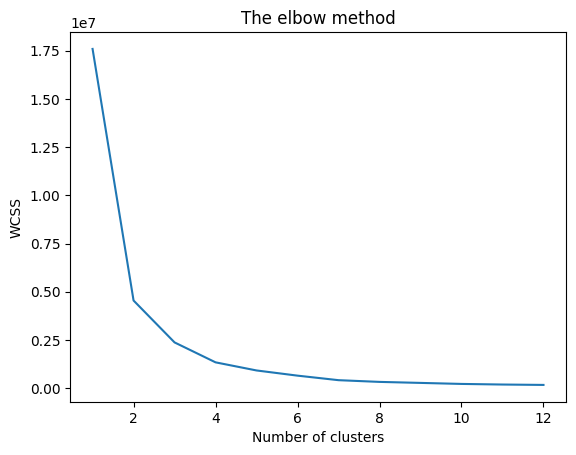

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,13):
  kmeans= KMeans(n_clusters=i ,init='k-means++' , random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum no. of cluster, k=4
## Model Creation

In [12]:
kmeans= KMeans(n_clusters=4 ,init='k-means++' , random_state=42)
pred_kmeans = kmeans.fit_predict(X)
print(pred_kmeans)

[1 1 3 3 2 3 3 3 1 1 3 3 3 1 3 3 3 1 3 1 2 2 1 1 1 2 3 3 1 1 3 3 1 3 1 1 1
 1 1 2 2 1 1 2 1 1 1 1 1 3 1 3 3 3 1 1 1 3 3 0 2 0 2 0 0 2 0 0 2 2 1 0 0 1
 1 0 0 0 2 0 0 2 2 0 0 0 0 2 2 2 0 0 0 0 0 1 2 0 2 0 2 2 0 0 2 0 0 0 0 2 2
 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 2 2 2 2 2 0 2 2 2 2 0 0 1 2 0 2
 2 0 0 0 0 2 2 2 0 1 2 2 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2 1 1 2]


To visualize the clusters taking 2 rows.

In [13]:
wine_X = data.iloc[: , [4,12]].values

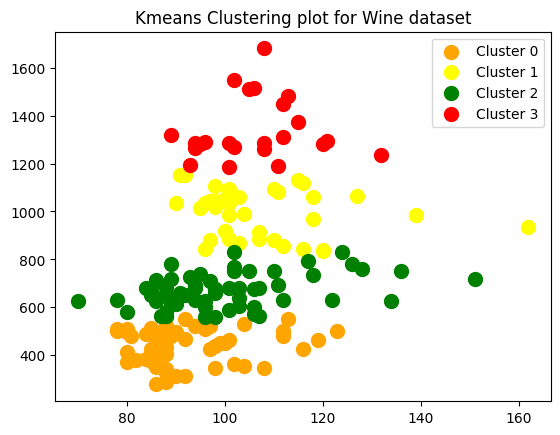

In [14]:
plt.scatter(wine_X[pred_kmeans == 0, 0], wine_X[pred_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 0')
plt.scatter(wine_X[pred_kmeans == 1, 0], wine_X[pred_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(wine_X[pred_kmeans == 2, 0], wine_X[pred_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(wine_X[pred_kmeans == 3, 0], wine_X[pred_kmeans == 3, 1], s = 100, c = 'red', label = 'Cluster 3')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

###Silhoutte Score of kmeans

In [15]:
from sklearn.metrics import silhouette_score
sil_avg= silhouette_score(wine_X,pred_kmeans)
print(sil_avg)

0.5586633328120457


####Agglomerative HierarchicalN Clustering
Plotting Dendrogram to find optimum clusters



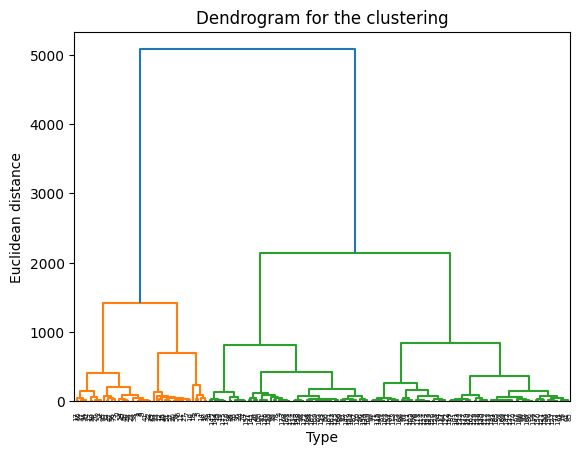

In [16]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(wine_X, method = 'ward'))
plt.title('Dendrogram for the clustering')
plt.xlabel('Type')
plt.ylabel('Euclidean distance')
plt.show()

Optimum no.of clusters= 2
##Model Creation

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=2)
y_hc = hc.fit(wine_X)
y_hc
pred1 = y_hc.labels_
pred1

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

##Plotting Hierarchical Clusters

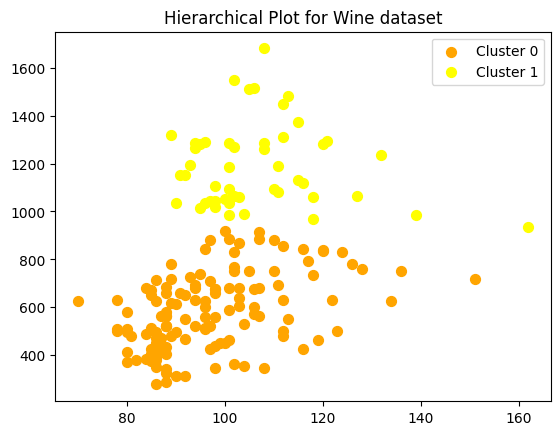

In [18]:
plt.scatter(wine_X[pred1 == 0, 0], wine_X[pred1 == 0, 1], s = 50, c = 'orange', label = 'Cluster 0')
plt.scatter(wine_X[pred1 == 1, 0], wine_X[pred1 == 1, 1], s = 50, c = 'yellow', label = 'Cluster 1')

plt.title('Hierarchical Plot for Wine dataset')
plt.legend()

In [19]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN()
db= dbscan.fit_predict(wine_X)
db

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

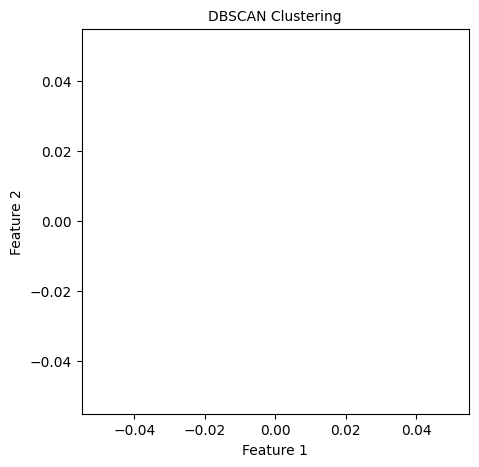

In [20]:
data['DBSCAN_labels']=dbscan.labels_
colors =["green", "orange",
         "gold", "blue", "k",
        "#550011", "purple",
         "red"]

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(wine_X[db == 0, 0], wine_X[db == 0, 1],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

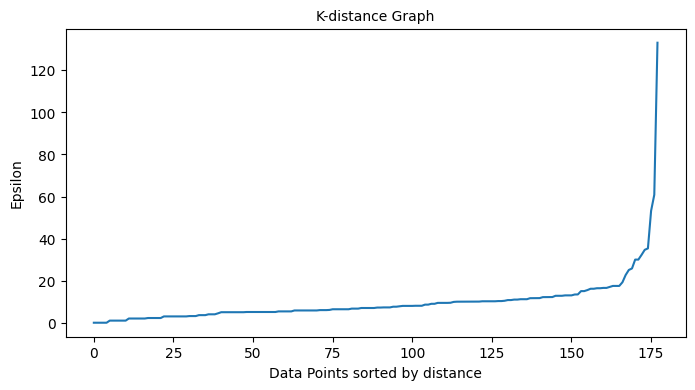

In [21]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(wine_X)
distances, indices = nbrs.kneighbors(wine_X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

eps= 30, minPoints=6

In [22]:
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(wine_X)

DBSCAN(eps=30, min_samples=6)

In [23]:
data['DBSCAN_opt_labels']=dbscan_opt.labels_
data['DBSCAN_opt_labels'].value_counts()

 1    113
-1     23
 0     17
 3     13
 2     12
Name: DBSCAN_opt_labels, dtype: int64

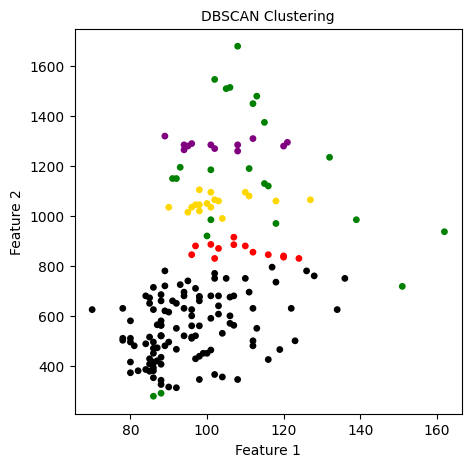

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(wine_X[:, 0],wine_X[:, 1],c=data['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()